# regression

In [28]:
import numpy as np 
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [29]:
data = make_regression(n_samples=1000, n_features=5, noise=0.2, random_state=42)

In [30]:
X = data[0]
y = data[1]
print(X[0])
print(y[0])

[ 2.05654356  0.60685059  0.48268789 -1.13088844  0.42009449]
74.8638525346159


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
print("X train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

X train shape:  (800, 5)
y train shape:  (800,)
X test shape:  (200, 5)
y test shape:  (200,)


In [35]:
import tensorflow as tf
import tensorflow.keras as tfk

In [36]:
model = tfk.models.Sequential(
    [
        tfk.layers.Input(shape=(5,)),
        tfk.layers.Dense(units=16,activation='relu'),
        tfk.layers.Dense(units=16,activation='relu'),
        tfk.layers.Dense(units=1,activation='linear'),
        
    ]
)

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# model = tfk.models.Sequential()
# model.add(tfk.layers.Input(shape=(5,)))
# model.add(tfk.layers.Dense(units=16,activation='relu'))
# model.add(tfk.layers.Dense(units=16,activation='relu'))
# model.add(tfk.layers.Dense(units=1,activation='linear'))
# model.summary()

In [39]:
loss = tf.losses.MeanSquaredError()
opt = tf.optimizers.Adam()
model.compile(loss=loss, optimizer=opt)

In [40]:
model.fit(X_train, y_train, validation_split=0.1, epochs=150, batch_size=100, verbose=2)

Epoch 1/150
8/8 - 1s - 75ms/step - loss: 4200.9175 - val_loss: 3882.6255
Epoch 2/150
8/8 - 0s - 5ms/step - loss: 4190.5474 - val_loss: 3873.0918
Epoch 3/150
8/8 - 0s - 5ms/step - loss: 4180.1040 - val_loss: 3862.8882
Epoch 4/150
8/8 - 0s - 5ms/step - loss: 4169.5552 - val_loss: 3851.6470
Epoch 5/150
8/8 - 0s - 5ms/step - loss: 4158.0928 - val_loss: 3839.2114
Epoch 6/150
8/8 - 0s - 5ms/step - loss: 4145.4746 - val_loss: 3825.4792
Epoch 7/150
8/8 - 0s - 5ms/step - loss: 4131.5234 - val_loss: 3810.1050
Epoch 8/150
8/8 - 0s - 5ms/step - loss: 4116.2583 - val_loss: 3791.9929
Epoch 9/150
8/8 - 0s - 5ms/step - loss: 4098.3779 - val_loss: 3771.3152
Epoch 10/150
8/8 - 0s - 5ms/step - loss: 4077.7180 - val_loss: 3746.9304
Epoch 11/150
8/8 - 0s - 5ms/step - loss: 4054.7024 - val_loss: 3720.0071
Epoch 12/150
8/8 - 0s - 5ms/step - loss: 4027.3872 - val_loss: 3690.4597
Epoch 13/150
8/8 - 0s - 5ms/step - loss: 3997.7979 - val_loss: 3655.4707
Epoch 14/150
8/8 - 0s - 5ms/step - loss: 3962.1091 - val_lo

In [41]:
model.evaluate(X_train, y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 35.5593


34.17951965332031

In [42]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.6726 


27.005016326904297

In [43]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [44]:
y_pred.shape

(200, 1)

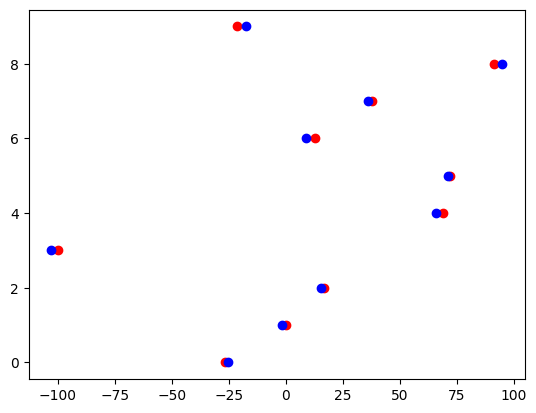

In [46]:
plt.scatter(y_pred[:10], range(10), color='red')
plt.scatter(y_test[:10], range(10), color='blue')